In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc
import scipy
%matplotlib inline

In [37]:
data = pd.read_csv('d1.csv')
data.columns

Index([u'id', u'pot', u'f', u'y'], dtype='object')

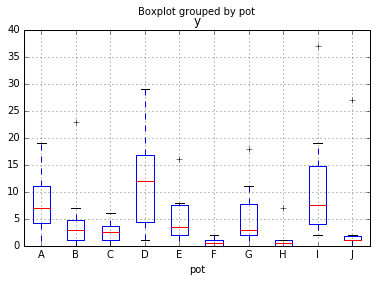

In [38]:
data.boxplot('y',by='pot')
plt.show()

In [39]:
#前処理
data['F'] = (data['f'] == 'T').astype(int)

In [17]:
#dummy_pot = pd.get_dummies(data['pot'],prefix='pot')
#data = pd.concat([data,dummy_pot],axis=1)

In [40]:
data['P'] = data['pot'].map(dict(zip(data['pot'].unique(),range(len(data['pot'].unique())))))

In [43]:
b1 = pymc.Normal('b1',mu=0,tau=1.0e-4)
b2 = pymc.Normal('b2',mu=0,tau=1.0e-4)
s  = pymc.Uniform('s',lower=0,upper=1.0e+4)
sp = pymc.Uniform('sp',lower=0,upper=1.0e+4)

rs = [pymc.Normal(name='rs_{0}'.format(i),mu=0,tau=s**(-2)) for i in range(len(data))]
rp = [pymc.Normal(name='rp_{0}'.format(i),mu=0,tau=sp**(-2)) for i in range(len(data['pot'].unique()))]

@pymc.deterministic
def p(b1=b1,b2=b2,s=s,sp=sp,rs=rs,rp=rp):
    L = []
    for i in range(len(data)):
        lambda_i = np.exp(b1 + b2*data.iloc[i]['F'] + rs[i] + rp[data.iloc[i]['P']])
        L.append(lambda_i)
    return np.asarray(L)

In [46]:
obs = pymc.Poisson('obs',mu=p,value=data['y'],observed=True)
model = pymc.Model([b1,b2,s,sp,obs])

In [47]:
mcmc = pymc.MCMC(model)
mcmc.sample(iter=10000,burn=1000,thin=10)

 [----             12%                  ] 1292 of 10000 complete in 6993.7 secHalting at iteration  1291  of  10000
